<a href="https://colab.research.google.com/github/ezulfica/School-Projects/blob/main/Heat_equation_(1d)_resolution_with_Stochastic_and_Deterministic_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As we want to solve the following PDE : 

$$
\frac{du}{dt}(x,t) = \frac{1}{2} \frac{d^2u}{dx^2}(x,t)
$$



with initial conditions : 

$u(x,0) = \sin( \pi x) \quad \forall x \in [0,1]$

$u(0, t) = u(1,t) = 0 \quad t\geqslant0 $  

The solution of our PDE is : $u(x,t) = \frac{1}{2}\sin(\pi x) e^{- \pi^2 t} $ 

In [4]:
import numpy as np
np.random.seed()
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import pandas as pd
from time import process_time


In [1]:
def u_sol(x,t) : 
  """
  Solution of our PDE
  """
  return np.sin(np.pi*x)* np.exp(-np.pi**2*t)/2

In [ ]:
n = 100 #number of step
x_val = np.linspace(0,1,n) #step of discretization for space
time = np.linspace(0,0.5, n) #step of discretization for time

A_sol = np.zeros((len(x_val), len(time))) #Initialazing a null matrix

#Impletation of u(x,t) for each coordonate of our Matrix
for i in range(n-1) :
  for j in range(n-1) : 
    A_sol[i,j] = u_sol(x_val[i],time[j])


t,x = np.meshgrid(time, x_val) #meshgrid for the surface plot

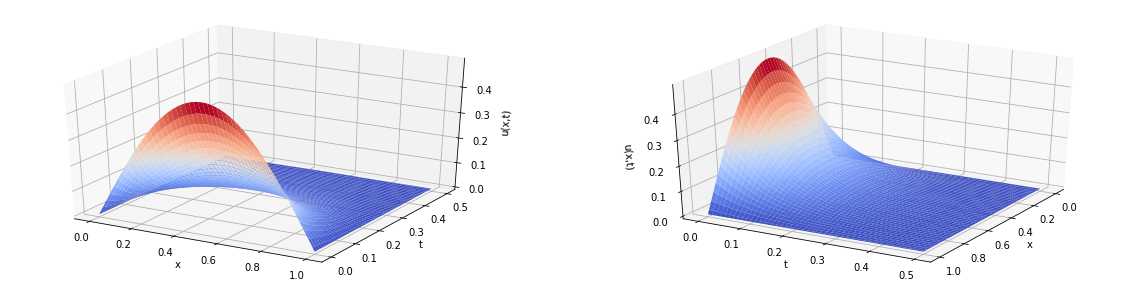

In [ ]:
fig, ax = plt.subplots(ncols = 2,subplot_kw={"projection": "3d"}, figsize = (20,5))

# Plot the surface.
for i in range(len(ax)) : 
  ax[i].plot_surface(x, t, A_sol, cmap=cm.coolwarm, linewidth=0, antialiased=True)
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('t')
  ax[i].set_zlabel('u(x,t)')
# Customize the z axis.

# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax[1].view_init(30, 30)
plt.show();

One approximation for our solution is to use Brownian Motion. The solution of the heat equation (1d) can be approximated with Brownian Motion as the method is theorically similar to finite difference

One powerful result is that : with f a measurable and bounded, 
the solution u is unique and   $$u(x,t) =\mathbb{E}[f(x + B_t)]$$

In [11]:
def fi(x) :
  """
  return our initial condition which is u(x,0)
  """ 
  return np.sin(np.pi*x)/2

def f(x,t,B) : 
  """
  Monte carlo approximation of the solution with Brownian Motion 
  E(f(x+B[t]))

  x: value in space
  t: value in time

  B: Array of one or our multiple brownian trajectories
  Make sure to construct your brownian in the following shape : (t,d)
  Meaning B[0] is the origin of the d trajectory, B[1] is the point for all trajectories in t1

  return: Return the mean value of sin(pi(x+Bt)) for x,t
  """
  u = np.sin(np.pi*(x + B[t]))/2
  return np.mean(u)

In [ ]:
f()

In [6]:
n = 100 #number of step
d = 1000 #number of brownian trajectories

t0 = process_time() #to evaluate the process time of computation
time = np.linspace(0,0.5,n) #discretisation of time
dt = time[1] - time[0] #time step

dB = np.sqrt(dt)*np.random.randn(n-1,d)
B = np.concatenate((np.zeros((1,d)), np.cumsum(dB,0)), axis = 0) #increment 

x_val = np.linspace(0,1, n) #step in space

#Initializating a null matrix
A_stoch = np.zeros((len(x_val), len(time)))
#Incrementing the solution for each coordinate with a for loop
for i in range(n) :
  for j in range(n) : 
    A_stoch[i,j] = f(x_val[i],j,B)

t1 = t0 - process_time() #ending process time evaluation


In [9]:
B.shape

(100, 1000)

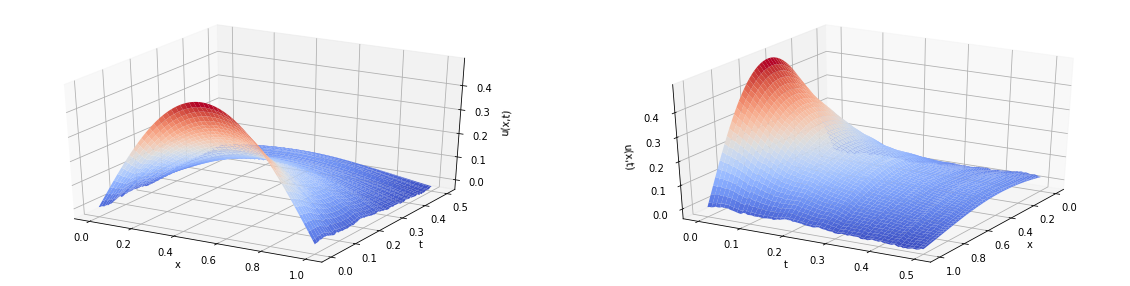

In [ ]:
fig, ax = plt.subplots(ncols = 2,subplot_kw={"projection": "3d"}, figsize = (20,5))

# Plot the surface.
for i in range(len(ax)) : 
  ax[i].plot_surface(x, t, A_stoch, cmap=cm.coolwarm, linewidth=0, antialiased=True)
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('t')
  ax[i].set_zlabel('u(x,t)')
# Customize the z axis.

# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax[1].view_init(30, 30)
plt.show();

An another method is to use the explicit finite difference method which use Taylor's formula to calculate each coordinate of our mesh with the following formula : 

$$ \frac{u_{i,j+1} - u_{i,j}}{\Delta t} =  \frac{u_{i-1,j} - 2u_{i,j} - u_{i+1,j}}{2 \Delta x^2} $$

with $u_{i,j} = u(x_i, t_j)$

A condition for stability is that : $$ \frac{Δt}{2 Δx^2} \leqslant \frac{1}{2} $$ 

which implies : $$ \frac{1}{Δt} \leqslant \frac{1}{Δx^2} $$ 

In our case, with $n_x = 5$ the number of step in space, we need to set up our time step at maximum $n_t = 25$  

In [ ]:
t0_det = process_time() #starting evaluating the processus computation time
n = 5 #initializing space step
x_val = np.linspace(0,1,n) #discretizaton of [0,1] in n points
dx = x_val[1] - x_val[0] #delta x
n2 = n**2 # time step
time_2 = np.linspace(0,0.5,n2) #discretizaton of time
dt = time_2[1] - time_2[0] #delta t

D = 1/2 #thermal diffusion
s = D*dt/dx**2 

#initialazing a null matrix (5,25)
A_det = np.zeros((n,n2))
#The first column is composed of the value u(x,0)
A_det[:,0] = np.array([fi(x) for x in x_val])
#the last line has only zeros
A_det[n-1,:] = 0

#Adding for each column and row the value from the explicit formula through a for loop 
for i in range(1,n-1) :  
  for j in range(0,n2-1) : 
    A_det[i,j+1] = s*A_det[i-1,j] + (1-2*s)*A_det[i,j] + s*A_det[i+1,j]


t1_det = t0_det- process_time() #Ending evaluating process time

In [ ]:
t2,x2 = np.meshgrid(time_2, x_val) # new meshgrid for our new plot

#Solution for the second mesh
A_sol2 = np.zeros((len(x_val), len(time_2)))
for i in range(n-1) :
  for j in range(n2-1) : 
    A_sol2[i,j] = u_sol(x_val[i],time_2[j])

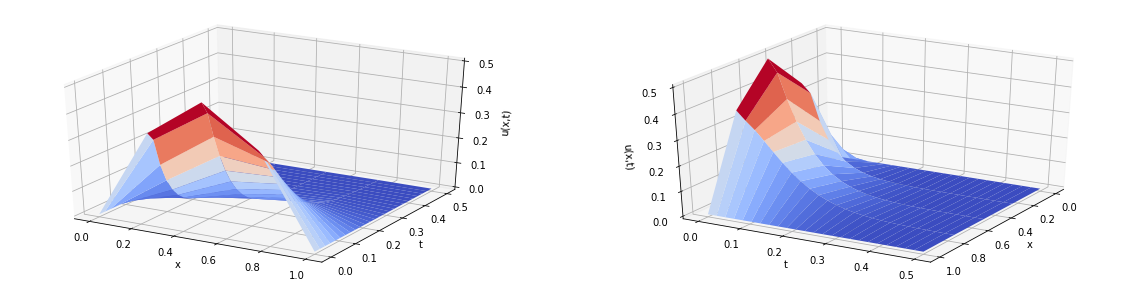

In [ ]:
fig, ax = plt.subplots(ncols = 2,subplot_kw={"projection": "3d"}, figsize = (20,5))

# Plot the surface.
for i in range(len(ax)) : 
  ax[i].plot_surface(x2, t2, A_det, cmap=cm.coolwarm, linewidth=0, antialiased=True)
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('t')
  ax[i].set_zlabel('u(x,t)')
# Customize the z axis.

# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax[1].view_init(30, 30)
plt.show();

In [ ]:
err_deterministic = np.mean(np.sqrt((A_sol2 - A_det)**2))
err_stochastic = np.mean(np.sqrt((A_sol - A_stoch)**2))
print(f"RMSE with stochastic method : {err_stochastique}\nRMSE with explicit finite difference method : {err_deterministe} \n") 
print(f"process time with stochastic method : {-t1}\nprocess time with explicit finite difference method : {-t1_det}") 

RMSE with stochastic method : 0.05496262989026201
RMSE with explicit finite difference method : 0.012150181840693842 

process time with stochastic method : 0.5562075110000002
process time with explicit finite difference method : 0.0009980869999992592


The brownian motion approximation is more efficient for the 1d heat equation as we can see. We can have a better meshgrid for time and space and simulate it within a second, which is a good performance. 

Also, if you start increasing the space step for the finite difference method, the approximation becomes less precise. 